In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def function(w,b,x):
  return (w*x + b)

In [3]:
def cost(x,y,w,b):

  total_cost = 0

  quant = x.shape[0]

  for i in range(quant):

    y_f = function(w,b,x[i])
    y_diff = (y_f - y[i])
    total_cost += y_diff**2
    

  total_cost = total_cost/(2*quant)

  return total_cost

In [4]:
def partial_derivative_w(x,y,w,b):

    derivative = (function(w,b,x) - y) * x

    return derivative

def partial_derivative_b(x,y,w,b):

    derivative = (function(w,b,x) - y)

    return derivative

In [5]:
def find_derivatives(x,y,w,b):

  derivative_w = 0
  derivative_b = 0

  quant = x.shape[0]

  for j in range(quant):

    derivative_w += partial_derivative_w(x[j],y[j],w,b)
    derivative_b += partial_derivative_b(x[j],y[j],w,b)

  derivative_w = derivative_w/quant
  derivative_b = derivative_b/quant

  return derivative_w,derivative_b

In [6]:
def normalize_data(x,y):
    x_max = x.max()
    y_max = y.max()

    x = x/x_max
    y = y/y_max

    return x, y, x_max, y_max

In [13]:
def find_parameters(x,y, lr = 0.001, iterations = 1000):

  w = 0
  b = 0

  current_cost = float('inf')

  for i in range(iterations):

    derivative_w,derivative_b = find_derivatives(x,y,w,b)

    w = w - lr*derivative_w
    b = b - lr*derivative_b

    current_cost = cost(x,y,w,b)

    if(i%1000 == 0):
      print("Total iterations: ", i+1)
      print("Total cost: ", current_cost)


  return w,b

In [8]:
df = pd.read_csv("machineLearning/data_for_lr.csv")
df = df.dropna()
df.head(10)


,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [9]:
df.describe()

,x,y
count,699.000000,699.000000
mean,50.014306,49.939869
std,28.954560,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,100.000000,108.871618


In [10]:
x = df.iloc[:, 0].to_numpy()
y = df.iloc[:, 1].to_numpy()

print("X values: ")
print(x[0:10])

print("Y values: ")
print(y[0:10])

x,y,x_max,y_max = normalize_data(x,y)

print("x normalized: ", x[0:10])
print("x max value: ", x_max)
print("y normalized: ", y[0:10])
print("y max value: ", y_max)


X values: 
[24. 50. 15. 38. 87. 36. 12. 81. 25.  5.]
Y values: 
[21.54945196 47.46446305 17.21865634 36.58639803 87.28898389 32.46387493
 10.78089683 80.7633986  24.61215147  6.96331907]
x normalized:  [0.24 0.5  0.15 0.38 0.87 0.36 0.12 0.81 0.25 0.05]
x max value:  100.0
y normalized:  [0.19793452 0.43596728 0.1581556  0.33605083 0.80176069 0.29818492
 0.09902394 0.74182234 0.22606582 0.06395899]
y max value:  108.8716183


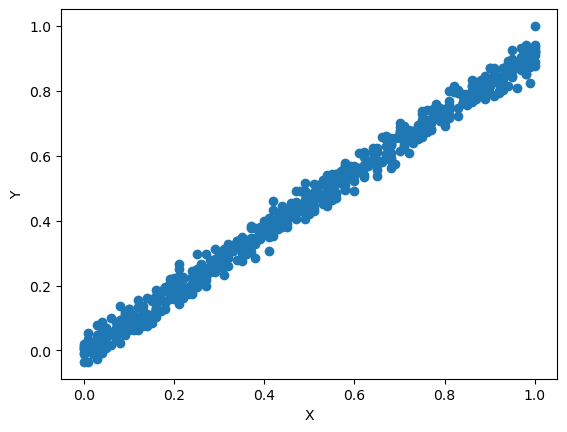

In [11]:
plt.scatter(x,y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [20]:
w,b = find_parameters(x,y, lr = 0.01, iterations = 10000)
print("w: ", w)
print("b: ", b)

Total iterations:  1
Total cost:  0.13787395550452505
Total iterations:  1001
Total cost:  0.0061149214940614295
Total iterations:  2001
Total cost:  0.001875091117129149
Total iterations:  3001
Total cost:  0.0007436918376147308
Total iterations:  4001
Total cost:  0.0004417777947937171
Total iterations:  5001
Total cost:  0.0003612119937516228
Total iterations:  6001
Total cost:  0.0003397129994123539
Total iterations:  7001
Total cost:  0.0003339759900160412
Total iterations:  8001
Total cost:  0.0003324450683229617
Total iterations:  9001
Total cost:  0.0003320365416728492
w:  0.9181488554636857
b:  -0.0004673783178250513


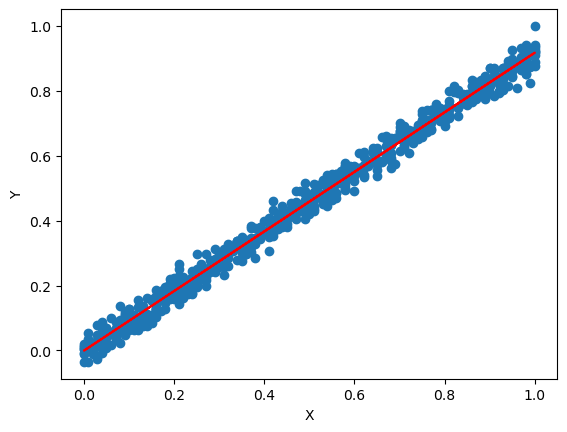

In [21]:
plt.scatter(x,y)
plt.plot(x,function(w,b,x), color =  "red")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()